   position             team    points       won      lost      draw  \
0         1    Real Sociedad  0.258172  1.195687 -1.171997 -0.518105   
1         2      Real Madrid  0.258172  1.404289 -0.949652 -1.126993   
2         3  Atlético Madrid  0.059494  0.778485 -0.949652 -0.213661   
3         4         Valencia  0.059494  0.569884 -1.171997  0.395227   
4         5        Barcelona -0.006732  0.987086 -0.504963 -1.126993   

     played  goals_for  goals_against  goal_difference  year  
0 -0.349873   0.273950      -1.493894         0.077455  1980  
1 -0.349873   1.169707      -0.855422         0.089208  1980  
2 -0.349873   0.721828      -0.536186         0.054166  1980  
3 -0.349873  -0.109946      -0.695804         0.023462  1980  
4 -0.349873   1.169707      -0.536186         0.074625  1980  
(186, 11)
position             int64
team                object
points             float64
won                float64
lost               float64
draw               float64
played           

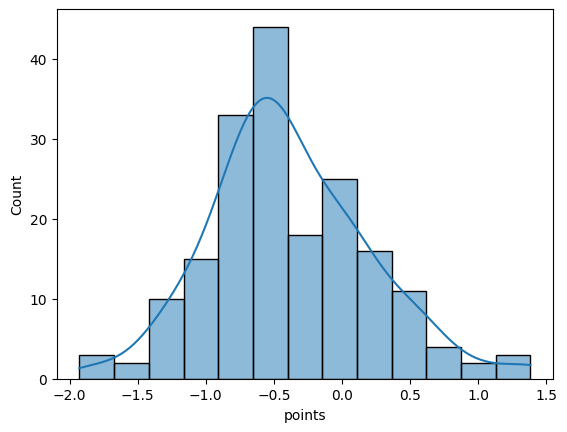

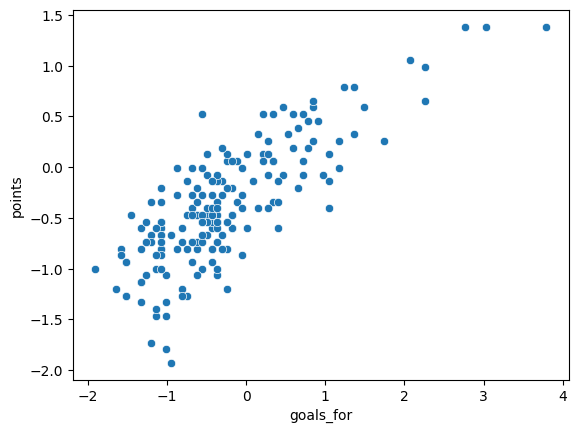

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
arr=[]
year1=1980
year2=1981
while(year1!=1990):
    string=str(year1)+"-"+str(year2)[2:]
    final_string="./normalized_data/"+string+"_normalized.csv"
    arr.append(final_string)
    year1=year1+1
    year2=year2+1
data_frames = []
for file_name in arr:
    data = pd.read_csv(file_name)
    data_frames.append(data)
la_liga = pd.concat(data_frames)




     
     
data= la_liga[['position', 'team', 'points', 'won', 'lost', 'draw', 'played', 'goals_for', 'goal_difference']]
print(la_liga.head())


print(la_liga.shape)


print(la_liga.dtypes)


print(la_liga.isnull().sum())


print(la_liga.describe())


sns.histplot(la_liga['points'], kde=True)
plt.show()


sns.scatterplot(x='goals_for', y='points', data=la_liga)
plt.show()



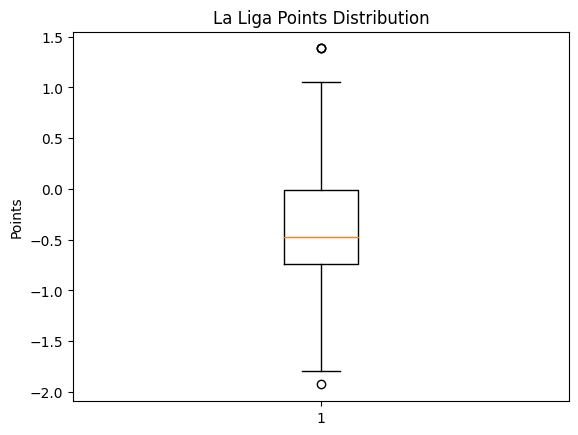

Outliers:
    position         team    points       won      lost      draw    played  \
17        18    Castellón -1.927287 -2.141933  2.607861 -0.822549 -0.349873   
0          1  Real Madrid  1.384015  3.073099 -2.061375 -0.822549  0.777873   
0          1  Real Madrid  1.384015  2.447295 -2.728409  1.004115  0.777873   
0          1  Real Madrid  1.384015  2.655896 -2.506065  0.395227  0.777873   

    goals_for  goals_against  goal_difference  year  
17  -0.941720       2.735980        -0.171297  1981  
0    3.025203      -1.733320         0.214069  1987  
0    2.769273      -0.855422         0.162276  1988  
0    3.792995      -0.775613         0.205394  1989  


In [5]:
plt.boxplot(la_liga['points'])


plt.title('La Liga Points Distribution')
plt.ylabel('Points')

plt.show()

q1 = la_liga['points'].quantile(0.25)
q3 = la_liga['points'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr

outliers = la_liga[(la_liga['points'] > upper_bound) | (la_liga['points'] < lower_bound)]
print('Outliers:')
print(outliers)

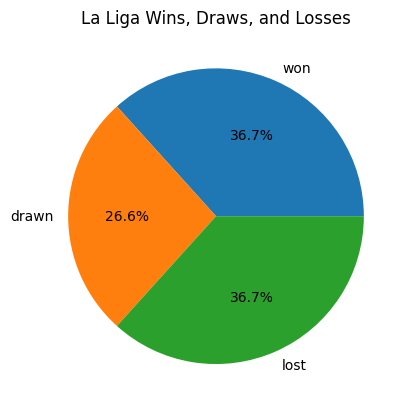

In [6]:
arr=[]
year1=1980
year2=1981
while(year1!=1990):
    string=str(year1)+"-"+str(year2)[2:]
    final_string="./orig_data/laliga_points_table_"+string+".csv"
    arr.append(final_string)
    year1=year1+1
    year2=year2+1
data_frames = []
for file_name in arr:
    data = pd.read_csv(file_name)
    data_frames.append(data)
la_liga = pd.concat(data_frames)




     
data= la_liga[['position', 'team', 'played', 'won', 'drawn', 'lost', 'goals_for', 'goals_against', 'goal_difference', 'points']]

wins = la_liga['won'].sum()
draws = la_liga['drawn'].sum()
losses = la_liga['lost'].sum()

values = [wins, draws, losses]
labels = ['won', 'drawn', 'lost']

plt.pie(values, labels=labels, autopct='%1.1f%%')

plt.title('La Liga Wins, Draws, and Losses')

plt.show()

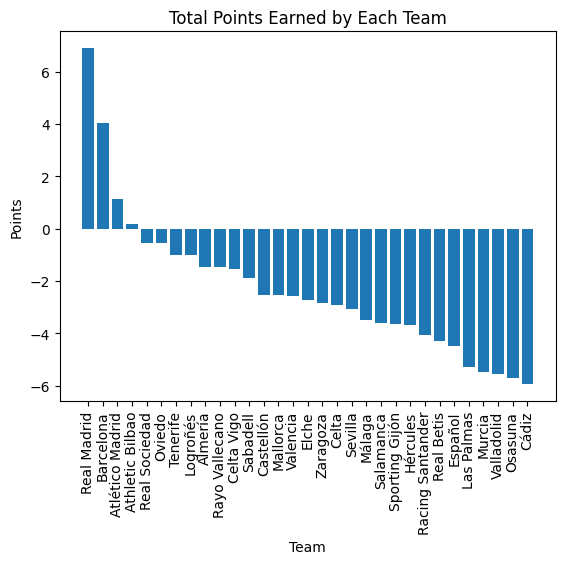

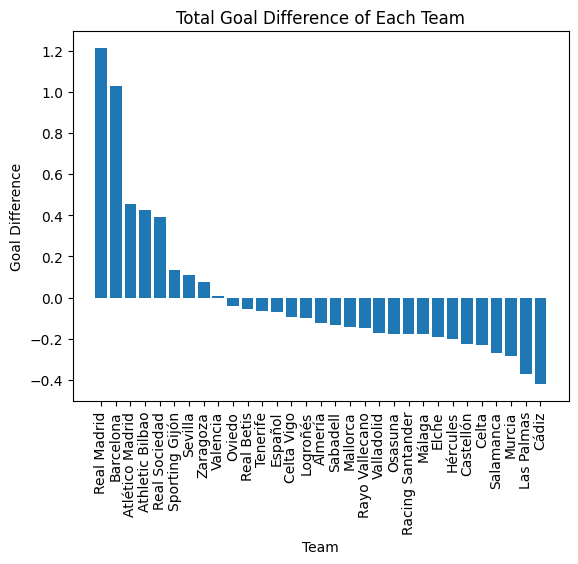

In [7]:
arr=[]
year1=1980
year2=1981
while(year1!=1990):
    string=str(year1)+"-"+str(year2)[2:]
    final_string="./normalized_data/"+string+"_normalized.csv"
    arr.append(final_string)
    year1=year1+1
    year2=year2+1
data_frames = []
for file_name in arr:
    data = pd.read_csv(file_name)
    data_frames.append(data)
df = pd.concat(data_frames)

# Create a new dataframe that groups the data by team
team_df = df.groupby('team').sum()

# Sort the teams by total points
team_df = team_df.sort_values('points', ascending=False)

# Plot the bar chart of points earned
plt.bar(team_df.index, team_df['points'])
plt.xticks(rotation=90)
plt.title('Total Points Earned by Each Team')
plt.xlabel('Team')
plt.ylabel('Points')
plt.show()

# Sort the teams by goal difference
team_df = team_df.sort_values('goal_difference', ascending=False)

# Plot the bar chart of goal difference
plt.bar(team_df.index, team_df['goal_difference'])
plt.xticks(rotation=90)
plt.title('Total Goal Difference of Each Team')
plt.xlabel('Team')
plt.ylabel('Goal Difference')
plt.show()